# Volcanoplot

Example data from Galaxy training material: 
https://training.galaxyproject.org/training-material/topics/transcriptomics/tutorials/rna-seq-viz-with-volcanoplot/tutorial.html
https://zenodo.org/record/2529117

Similar to the scatter plot but with some extra things that people were always asking me to do:

 
1) label/colour up/down large and small significance values differently.   
2) annotate certain points on the volcanoplot

Parameters:  

    df: pd.DataFrame, 
    log_fc: str --> column with the logFoldChange values in it
    p_val: str --> column with the p-values in it
    label_column: str --> column with the genes in it
    title='' --> title
    xlabel='' --> xlabel
    ylabel='' --> ylabel
    invert=False --> whether or not you want to invert the data
    p_val_cutoff=0.05 --> cutoff for the adjusted pvalue (for showing the colours)
    log_fc_cuttoff=2 --> logFoldChange cutoff 
    colours=None --> a dictionary of colours for the low and high significant values
    offset=None --> offset for the log10 computation
    values_to_label=None --> a list that you want to label e.g. [gene1, gene2, ...] as strings.
    max_labels=20 --> the maximum number of labels that you want to display on the graph (will show the top X values)
    text_colours={} --> a dictionary of colours for the text of the values/genes you want to label on the volcano
    values_colours={} --> a dictionary of colours for the background of the text for the values/genes you want to label on the volcano
    figsize=(3, 3), 
    title_font_size=8, 
    label_font_size=6, 
    title_font_weight=700, 
    config={}
    

Config options = any of the parameters with the same name but with in a dictionary format instead, and also includes default parameters for the visualisation such as the font family and font.

Example config:
```
config={'figsize':(4, 5),  # Size of figure (x, y)
        'title_font_size': 16, # Size of the title (pt)
        'label_font_size': 12, # Size of the labels (pt)
        'title_font_weight': 700, # 700 = bold, 600 = normal, 400 = thin
        'font_family': 'sans-serif', # 'serif', 'sans-serif', or 'monospace'
        'font': ['Tahoma'] # Default: Arial  # http://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/
}
```

## Loading data

In [1]:
import pandas as pd
from sciviso import Barchart, Boxplot, Heatmap, Histogram, Scatterplot, Violinplot, Volcanoplot, Line
import matplotlib.pyplot as plt

df = pd.read_csv('limma-voom_luminalpregnant-luminallactate.tsv', sep='\t')
df

,ENTREZID,SYMBOL,GENENAME,logFC,AveExpr,t,P.Value,adj.P.Val
0,12992,Csn1s2b,casein alpha s2-like B,-8.603611,3.562950,-43.796498,3.830650e-15,6.053959e-11
1,13358,Slc25a1,solute carrier family 25 (mitochondrial carrie...,-4.124175,5.779699,-29.907849,1.758595e-13,1.389642e-09
2,11941,Atp2b2,"ATPase, Ca++ transporting, plasma membrane 2",-7.386986,1.282143,-27.819499,4.836363e-13,2.432800e-09
3,20531,Slc34a2,"solute carrier family 34 (sodium phosphate), m...",-4.177812,4.278629,-27.072723,6.157428e-13,2.432800e-09
4,100705,Acacb,acetyl-Coenzyme A carboxylase beta,-4.314320,4.440914,-25.223566,1.499977e-12,4.741129e-09
...,...,...,...,...,...,...,...,...
15799,20525,Slc2a1,solute carrier family 2 (facilitated glucose t...,-0.000876,8.021892,0.000000,9.999997e-01,9.999999e-01
15800,103836,Zfp692,zinc finger protein 692,-0.000015,4.837269,0.000000,9.999997e-01,9.999999e-01
15801,170718,Idh3b,isocitrate dehydrogenase 3 (NAD+) beta,-0.000833,6.668953,0.000000,9.999998e-01,9.999999e-01
15802,71810,Ranbp3,RAN binding protein 3,0.000107,5.753686,0.000000,9.999998e-01,9.999999e-01


## Volcano plot basic


--------------------------------------------------------------------------------
No offset was provided, setting offset to be smallest value recorded in dataset: 	6.05395889659601e-11	
--------------------------------------------------------------------------------


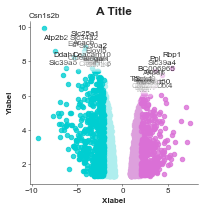

In [2]:
volcanoplot = Volcanoplot(df, 'logFC', 'adj.P.Val', 
                          'SYMBOL', 'A Title', 
                          'Xlabel', 'Ylabel',
                          label_big_sig=True)
volcanoplot.plot()
plt.show()

## Volcano label certain genes

--------------------------------------------------------------------------------
No offset was provided, setting offset to be smallest value recorded in dataset: 	6.05395889659601e-11	
--------------------------------------------------------------------------------


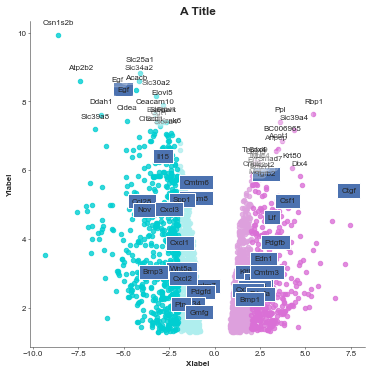

In [3]:
gene_list = list(pd.read_csv('volcano_genes.tsv', sep='\t')['GeneID'].values)

volcanoplot = Volcanoplot(df, 'logFC', 'adj.P.Val', 
                          'SYMBOL', 'A Title', 
                          'Xlabel', 'Ylabel',
                          values_to_label=gene_list,
                          config={'figsize': (6,6)})
volcanoplot.plot()
plt.show()

--------------------------------------------------------------------------------
No offset was provided, setting offset to be smallest value recorded in dataset: 	6.05395889659601e-11	
--------------------------------------------------------------------------------


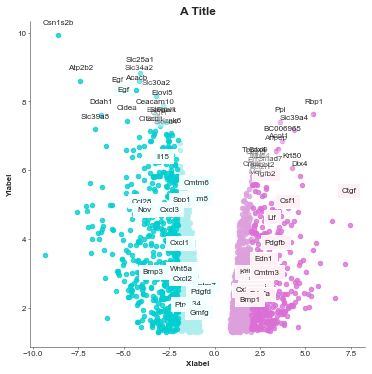

In [4]:
## Update the default params to make it look nicer
gene_list = list(pd.read_csv('volcano_genes.tsv', sep='\t')['GeneID'].values)

# Colour the outside lightgrey
value_colours = {}
log_fc = df['logFC'].values
for i, g in enumerate(df['SYMBOL'].values):
    if g in gene_list:
        if log_fc[i] > 0:
            value_colours[g] = 'lavenderblush'
        else:
            value_colours[g] = 'azure'
    
# You could also explicityly set the colour for each gene just in a dictionary: {'gene': 'color'}

volcanoplot = Volcanoplot(df, 'logFC', 'adj.P.Val', 
                          'SYMBOL', 'A Title', 
                          'Xlabel', 'Ylabel',
                          values_to_label=gene_list,
                          values_colours=value_colours,
                          config={'figsize': (6,6)})
volcanoplot.plot()
plt.show()

--------------------------------------------------------------------------------
No offset was provided, setting offset to be smallest value recorded in dataset: 	6.05395889659601e-11	
--------------------------------------------------------------------------------


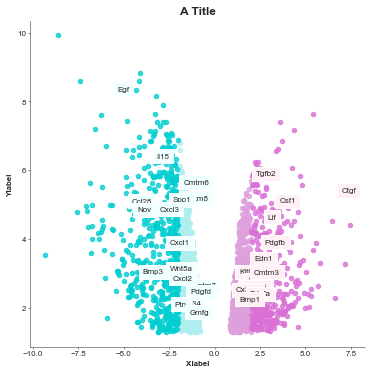

In [5]:

volcanoplot = Volcanoplot(df, 'logFC', 'adj.P.Val', 
                          'SYMBOL', 'A Title', 
                          'Xlabel', 'Ylabel',
                          values_to_label=gene_list,
                          values_colours=value_colours,
                          max_labels=0, # The default of the max labels is 20 but you just set to however many values
                          # you want to display
                          config={'figsize': (6,6)})
volcanoplot.plot()
plt.show()

## Advanced style options

Here are some examples with extra style options.

--------------------------------------------------------------------------------
No offset was provided, setting offset to be smallest value recorded in dataset: 	6.05395889659601e-11	
--------------------------------------------------------------------------------


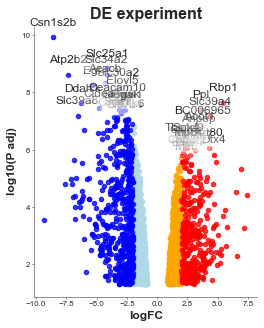

In [6]:
colours = {'ns_small-neg-logFC': 'lightgrey',
                        'ns_small-pos-logFC': 'lightgrey',
                        'ns_big-neg-logFC': 'grey',
                        'ns_big-pos-logFC': 'grey',
                        'sig_small-neg-logFC': 'lightblue',
                        'sig_small-pos-logFC': 'orange',
                        'sig_big-neg-logFC': 'blue',
                        'sig_big-pos-logFC': 'red'}

volcanoplot = Volcanoplot(df,
                          log_fc='logFC', 
                          p_val='adj.P.Val', 
                            label_column='SYMBOL', # The column that we want to use to identify the values/labelling 
                            title='DE experiment',
                            xlabel='logFC', 
                            ylabel='log10(P adj)', 
                            invert=False, # If you need to invert the data
                            p_val_cutoff=0.05, # Cutoff for the "significant" colours
                            log_fc_cuttoff=2,  # LogFC cutoff
                            colours=colours,  # colours of high and low colours 
                            offset=None, # Offset for the log10 transformation
                            text_colours={}, # Colourmap like the colours but for the front facing text
                            values_to_label=None, # A list of values to label i.e. some genes of interest
                            max_labels=20, 
                            values_colours={}, # Colours for that list as a dictionary 
                            figsize=(3, 3), #
                            title_font_size=8, 
                            label_font_size=6, 
                            title_font_weight=700, 
                          # Set points to be coloured by this column
                            # Config options = any of the parameters with the same name but with in a dictionary format instead
                             # You could also pass these as individual parameters, but it's easier to set as a dictionary
                            # also, then you can re-use it for other charts!
                          config={'s': 200, # Make points larger
                                  'figsize':(4, 5),  # Size of figure (x, y)
                                  'title_font_size': 16, # Size of the title (pt)
                                  'label_font_size': 12, # Size of the labels (pt)
                                  'title_font_weight': 700, # 700 = bold, 600 = normal, 400 = thin
                                  'font_family': 'sans-serif', # 'serif', 'sans-serif', or 'monospace'
                                  'font': ['Tahoma'] # Default: Arial  # http://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/
                          })
volcanoplot.plot()
plt.show()

## Saving

Saving is the same for all plots and v simple, just make sure you specify what ending you want it to have.

--------------------------------------------------------------------------------
No offset was provided, setting offset to be smallest value recorded in dataset: 	6.05395889659601e-11	
--------------------------------------------------------------------------------


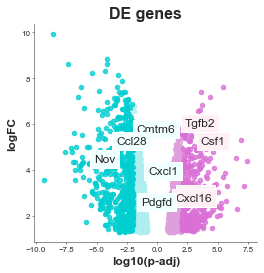

In [13]:
## Update the default params to make it look nicer
gene_list = list(pd.read_csv('volcano_genes.tsv', sep='\t')['GeneID'].values)
gene_list = gene_list[:5] + gene_list[-5:]
# Colour the outside lightgrey
value_colours = {}
log_fc = df['logFC'].values
for i, g in enumerate(df['SYMBOL'].values):
    if g in gene_list:
        if log_fc[i] > 0:
            value_colours[g] = 'lavenderblush'
        else:
            value_colours[g] = 'azure'
    
# You could also explicityly set the colour for each gene just in a dictionary: {'gene': 'color'}

volcanoplot = Volcanoplot(df, 'logFC', 'adj.P.Val', 
                          'SYMBOL', 'DE genes', 
                          'log10(p-adj)', 'logFC',
                          values_to_label=gene_list,
                          values_colours=value_colours,
                          max_labels=0,
                          label_font_size=12,
                           config={'palette': ['orchid', 'paleturquoise', 'gold'], 
                           'figsize':(4, 4),  # Size of figure (x, y)
                           's': 20,
                           'title_font_size': 16, # Size of the title (pt)
                           'label_font_size': 12, # Size of the labels (pt)
                           'title_font_weight': 700, # 700 = bold, 600 = normal, 400 = thin
                           'font_family': 'sans-serif', # 'serif', 'sans-serif', or 'monospace'
                           'font': ['Tahoma'] # Default: Arial  # http://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/
                           })
volcanoplot.plot()
plt.savefig('volcano.svg', bbox_inches='tight') # .png, .pdf, .jpg
plt.savefig('volcano.png', dpi=300) # .png, .pdf, .jpg
plt.savefig('chart.pdf') # .png, .pdf, .jpg